# Diplodatos Kaggle Competition

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the given labels
breed = pd.read_csv('../data/breed_labels.csv')
color = pd.read_csv('../data/color_labels.csv')
state = pd.read_csv('../data/state_labels.csv')

Now we take a look at the labels, just to understand what these are

In [3]:
breed.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [4]:
color.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [5]:
state

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


And now we are ready to deal with the *original* dataset...

In [6]:
original_df = pd.read_csv('../data/train.csv')

In [7]:
original_df.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Description',
       'AdoptionSpeed', 'PID'],
      dtype='object')

In [8]:
original_df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,AdoptionSpeed,PID
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,1.454734,10.520412,265.469854,74.388868,1.779059,2.230675,3.236912,1.856738,1.860518,1.460971,1.729730,1.566528,1.912115,1.036666,1.584011,20.809960,41345.994613,2.518900,7477.025799
std,0.497970,18.374027,60.121490,123.434010,0.684763,1.743985,2.748595,2.974465,0.547535,0.593843,0.670791,0.701482,0.564041,0.198228,1.488348,78.397243,32.409109,1.176018,4310.921553
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,3768.250000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,7473.500000
75%,2.000000,12.000000,307.000000,188.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,4.000000,11200.750000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,4.000000,14992.000000


In [10]:
original_df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,AdoptionSpeed,PID
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,Nibble is a 3+ month old ball of cuteness. He ...,2,0
1,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,"Good guard dog, very alert, active, obedience ...",2,3
2,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,This handsome yet cute boy is up for adoption....,2,4
3,2,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,This is a stray kitten that came to my house. ...,2,5
4,2,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,anyone within the area of ipoh or taiping who ...,1,6


Create a function to transform the datasets. This is done by means of a function so that the transformations are the same for the training and testing datasets... We replace the encodings just to make it easy to "visualize" the data

In [9]:
def transform_data(train_data_fname, test_data_fname):
    def transform_columns(df):
        df = df.drop(["Description"], axis=1)
        df.Type = df.Type.replace({1: 'Dog', 2: 'Cat'})
        df.Gender = df.Gender.replace({1:'Male', 2:'Female', 3:'Mixed'})
        df.MaturitySize = df.MaturitySize.replace({1:'S', 2:'M', 3:'L', 4:'XL', 0:'N/A'})
        df.FurLength = df.FurLength.replace({1:'S', 2:'M', 3:'L', 0:'N/A'})
        df.Vaccinated = df.Vaccinated.replace({1:'T', 2:'N', 3:'N/A'})
        df.Dewormed = df.Dewormed.replace({1:'T', 2:'F', 3:'N/A'})
        df.Sterilized = df.Sterilized.replace({1:'T', 2:'F', 3:'N/A'})
        df.Health = df.Health.replace({1:'Healthy', 2: 'MinorInjury', 3:'SeriousInjury', 0: 'N/A'})
        df.Color1 = df.Color1.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color2 = df.Color2.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color3 = df.Color3.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Breed1 = df.Breed1.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        df.Breed2 = df.Breed2.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        return df
    
    df_train = pd.read_csv(train_data_fname)
    df_train = transform_columns(df_train)
    df_test = pd.read_csv(test_data_fname)
    df_test = transform_columns(df_test)
    
    df = pd.concat([df_train, df_test], sort=True)

    # set dummy variables for everything
    # except from Age, Quantity, Fee
    df = pd.get_dummies(df)
    # get train and test back
    n = len(df_train)
    df_train = df.iloc[:n]
    df_test = df.iloc[n:]
    
    y = df_train['AdoptionSpeed']
    X = df_train.drop('AdoptionSpeed', axis=1)
    yy = None
    XX = df_test.drop('AdoptionSpeed', axis=1)

    return X, y, XX, yy

Load the data...

In [11]:
X, y, XX, yy = transform_data("../data/train.csv", "../data/test.csv")

Create the model and evaluate it

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier as RFC

In [16]:
params = {'criterion':('gini','entropy'), 
          'min_samples_leaf':(1,3,7),
          'min_samples_split':(150,160,170),
          'max_features':(20,30,40,50),
          'n_estimators' : (4,14,24,34),
          'min_impurity_decrease': (1.0e-1,1.0e-2,1.0e-3,0.0)}

tree = RFC(random_state=617)
grid = GridSearchCV(tree, params, scoring='accuracy', cv=5, iid=True, n_jobs=8)
grid.fit(X_train.drop("PID",axis=1), y_train)
print('Best Decision Tree accuracy: ', grid.best_score_)
print(grid.best_estimator_)

Best Decision Tree accuracy:  0.383826110436074
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=40, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=160,
            min_weight_fraction_leaf=0.0, n_estimators=34, n_jobs=None,
            oob_score=False, random_state=617, verbose=0, warm_start=False)


0.37984251968503935
0.38294


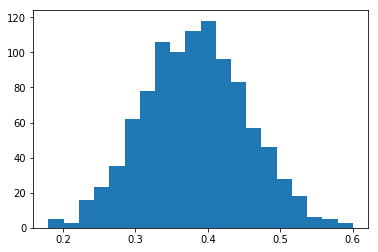

In [20]:
mejor_clafisicador = grid.best_estimator_
mejor_clasificador = RFC(random_state=617,n_estimators=39,min_samples_split=92,min_samples_leaf=1,min_impurity_decrease=1e-05,max_features=37,criterion='entropy')
mejor_clasificador.fit(X_train.drop("PID",axis=1), y_train)
print(mejor_clasificador.score(X_valid.drop("PID",axis=1),y_valid))

_scores = np.zeros(1000)
n = len(y_valid)
for i in range(1000):
    indx = np.random.choice(np.arange(n),size=50,replace=False)
    _scores[i] = mejor_clasificador.score(X_valid.drop("PID",axis=1).iloc[indx],y_valid.iloc[indx])

print(_scores.mean())

plt.hist(_scores,bins=20)
plt.show()

**And finally**, we predict the unknown label for the testing set

In [21]:
X.shape, XX.shape

((10582, 360), (4411, 360))

In [22]:
yy = mejor_clasificador.predict(XX.drop(["PID"], axis=1))
yy = yy.astype(np.int)

The last thing we do is generating a file that should be *submitted* on kaggle

In [40]:
submission = pd.DataFrame(list(zip(XX.PID, yy)), columns=["PID", "AdoptionSpeed"])

In [41]:
submission.to_csv("../data/submission.csv", header=True, index=False)